In [1]:
# Connection to google drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import cv2
import random
#import zipfile
import tensorflow as tf
from keras.models import Model
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Activation
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from sklearn.metrics import classification_report, log_loss, accuracy_score

In [3]:
#source path for training data
source_path='/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image'

#performing shuffeling operation so that datas are different when retraining model
train_brownspot_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/brownspot'
train_healthy_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/healthy'
train_hispa_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/hispa'
train_leafblast_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/leafblast'

folders = glob('/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/*')
print(folders)
labels = [i for i in range(len(folders))]

from sklearn.model_selection import train_test_split
from keras.utils import np_utils
new_label = np_utils.to_categorical(labels)

validating_brownspot_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/testing/segmented/brownspot'
validating_healthy_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/testing/segmented/healthy'
validating_hispa_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/testing/segmented/hispa'
validating_leafblast_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/testing/segmented/leafblast'


['/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/hispa', '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/healthy', '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/brownspot', '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/leafblast']


In [4]:
#shuffeling images of specific folders will be performed for retraining models
#files = os.listdir(train_brownspot_path)
#random.shuffle(files)

#files = os.listdir(train_healthy_path)
#random.shuffle(files)

#files = os.listdir(train_hispa_path)
#random.shuffle(files)

#files = os.listdir(train_leafblast_path)
#random.shuffle(files)

#files = os.listdir(validating_brownspot_path)
#random.shuffle(files)

#files = os.listdir(validating_healthy_path)
#random.shuffle(files)

#files = os.listdir(validating_hispa_path)
#random.shuffle(files)

#files = os.listdir(validating_leafblast_path)
#random.shuffle(files)

Training_DIR = os.path.join(source_path, 'training/segmented')
Validation_DIR = os.path.join(source_path, 'testing/segmented')


In [5]:
#importing pretrained model
#
pretrained_model = tf.keras.applications.DenseNet121(input_shape=(256,256,3),
                                                      include_top=False,
                                                      weights='imagenet')

29084464/29084464 [==============================] - 2s 0us/step


In [6]:
#pretrained_model.summary()

In [7]:
inputs = pretrained_model.input
x = tf.keras.layers.Flatten()(pretrained_model.output)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.1)(x)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

# create a model object
model = tf.keras.Model(inputs=inputs, outputs=outputs)


In [8]:
#model.summary()

In [9]:
# Use the Image Data Generator to import the images from the dataset
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    rotation_range=30,
                                    zoom_range=0.2,
                                    width_shift_range=0.1,
                                    height_shift_range=0.2,
                                    shear_range=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(Training_DIR,
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2978 images belonging to 4 classes.


In [11]:
test_set = test_datagen.flow_from_directory(Validation_DIR,
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 600 images belonging to 4 classes.


In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [14]:
train = model.fit(training_set,
                validation_data = test_set, 
                epochs = 20, 
                steps_per_epoch = len(training_set),
                validation_steps = len(test_set)
                )


Epoch 1/20
94/94 [==============================] - 59s 622ms/step - loss: 0.4299 - accuracy: 0.8640 - val_loss: 0.6148 - val_accuracy: 0.7217
Epoch 2/20
94/94 [==============================] - 59s 626ms/step - loss: 0.6783 - accuracy: 0.7700 - val_loss: 3729.0042 - val_accuracy: 0.2500
Epoch 3/20
94/94 [==============================] - 59s 623ms/step - loss: 0.7144 - accuracy: 0.7515 - val_loss: 1.3730 - val_accuracy: 0.6733
Epoch 4/20
94/94 [==============================] - 59s 622ms/step - loss: 0.5174 - accuracy: 0.8190 - val_loss: 0.8258 - val_accuracy: 0.7100
Epoch 5/20
94/94 [==============================] - 59s 621ms/step - loss: 0.4893 - accuracy: 0.8345 - val_loss: 0.9294 - val_accuracy: 0.6750
Epoch 6/20
94/94 [==============================] - 60s 632ms/step - loss: 0.4551 - accuracy: 0.8469 - val_loss: 0.6836 - val_accuracy: 0.7583
Epoch 7/20
94/94 [==============================] - 59s 628ms/step - loss: 0.4402 - accuracy: 0.8566 - val_loss: 0.5929 - val_accuracy: 0.7

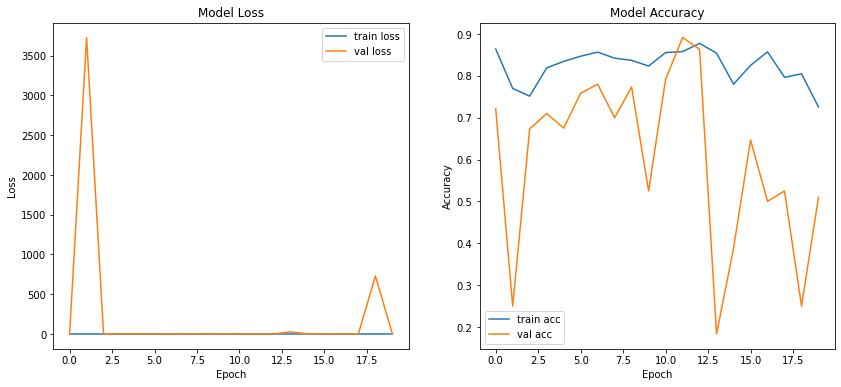

In [15]:
# plot the loss
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
plt.plot(train.history['loss'], label='train loss')
plt.plot(train.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
#plt.show()


plt.subplot(1,2,2)
# plot the accuracy
plt.plot(train.history['accuracy'], label='train acc')
plt.plot(train.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [16]:
print("Final Train Accuracy:", train.history['accuracy'][-1])
print("Final Test Accuracy:", train.history['val_accuracy'][-1])
print("Final Train Loss:", train.history['loss'][-1])
print("Final Test Loss:", train.history['val_loss'][-1])

Final Train Accuracy: 0.7256547808647156
Final Test Accuracy: 0.5099999904632568
Final Train Loss: 0.7030423879623413
Final Test Loss: 2.076439380645752


In [17]:
y_pred = model.predict(test_set)

19/19 [==============================] - 4s 121ms/step


<Figure size 432x288 with 0 Axes>

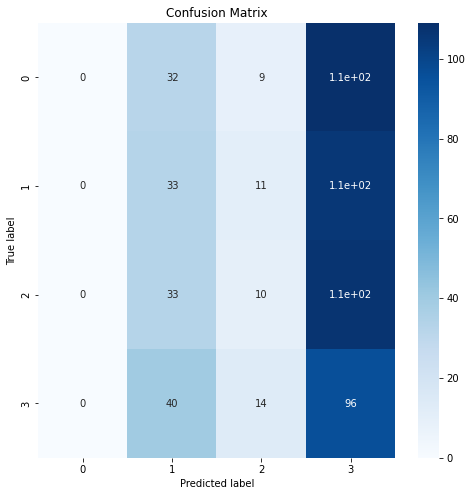

In [18]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

class_indices = test_set.classes
class_names = os.listdir(Validation_DIR)
class_dict = {i: name for i, name in enumerate(class_names)}
test_labels = [class_dict[i] for i in class_indices]
le = LabelEncoder()
encoded_test_labels = le.fit_transform(test_labels)

predictions = np.argmax(y_pred, axis = 1)

cm = confusion_matrix(encoded_test_labels, predictions)
plt.figure()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [19]:
#for precision calculation
# Total number of instances per class
class_totals = np.sum(cm, axis=0)

# Precision for each class
precision = np.zeros(len(cm))
for i in range(len(cm)):
    precision[i] = cm[i][i] / class_totals[i]

print("Precision per class:", precision)

Precision per class: [       nan 0.23913043 0.22727273 0.22966507]


<ipython-input-19-9b1955d84e4c>:8: RuntimeWarning: invalid value encountered in long_scalars
  precision[i] = cm[i][i] / class_totals[i]


In [20]:
#for f1 score
# Total number of instances per class
class_totals = np.sum(cm, axis=0)

# True positive predictions per class
tp = np.diag(cm)

# Precision and recall per class
precision = tp / class_totals
recall = tp / np.sum(cm, axis=1)

# F1 score per class
f1 = 2 * precision * recall / (precision + recall)

print("Recall score per class:", recall)
print("F1 score per class:", f1)

Recall score per class: [0.         0.22       0.06666667 0.64      ]
F1 score per class: [       nan 0.22916667 0.10309278 0.33802817]


<ipython-input-20-7ac551019b13>:9: RuntimeWarning: invalid value encountered in true_divide
  precision = tp / class_totals


In [21]:
# save it as a h5 file

#model1 = 20 epose
#model2 = 30 epose
tf.keras.models.save_model(model, '/content/drive/MyDrive/rice_leaf_disease/colab/models/model1.h5')


**starting form here model is being loaded for retraining**

**first retrain**

In [23]:
#!pip install pyyaml h5py  # Required to save models in HDF5 format
from tensorflow.keras.models import load_model
path = '/content/drive/MyDrive/rice_leaf_disease/colab/models/model1.h5'
model=load_model(path)

In [24]:
#source path for training data
source_path='/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image'

#performing shuffeling operation so that datas are different when retraining model
train_brownspot_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/brownspot'
train_healthy_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/healthy'
train_hispa_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/hispa'
train_leafblast_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/leafblast'

validating_brownspot_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/testing/segmented/brownspot'
validating_healthy_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/testing/segmented/healthy'
validating_hispa_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/testing/segmented/hispa'
validating_leafblast_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/testing/segmented/leafblast'

folders = glob('/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/*')
print(folders)
labels = [i for i in range(len(folders))]

from sklearn.model_selection import train_test_split
from keras.utils import np_utils
new_label = np_utils.to_categorical(labels)

['/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/hispa', '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/healthy', '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/brownspot', '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/leafblast']


In [25]:
#shuffeling images of specific folders
files = os.listdir(train_brownspot_path)
random.shuffle(files)

files = os.listdir(train_healthy_path)
random.shuffle(files)

files = os.listdir(train_hispa_path)
random.shuffle(files)

files = os.listdir(train_leafblast_path)
random.shuffle(files)

files = os.listdir(validating_brownspot_path)
random.shuffle(files)

files = os.listdir(validating_healthy_path)
random.shuffle(files)

files = os.listdir(validating_hispa_path)
random.shuffle(files)

files = os.listdir(validating_leafblast_path)
random.shuffle(files)

Training_DIR = os.path.join(source_path, 'training/segmented')
Validation_DIR = os.path.join(source_path, 'testing/segmented')


In [26]:
# Use the Image Data Generator to import the images from the dataset
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    rotation_range=30,
                                    zoom_range=0.2,
                                    width_shift_range=0.1,
                                    height_shift_range=0.2,
                                    shear_range=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [27]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(Training_DIR,
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2978 images belonging to 4 classes.


In [28]:
test_set = test_datagen.flow_from_directory(Validation_DIR,
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 600 images belonging to 4 classes.


In [29]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [30]:
train = model.fit(training_set,
                validation_data = test_set, 
                epochs = 20, 
                steps_per_epoch = len(training_set),
                validation_steps = len(test_set)
                )

Epoch 1/20
94/94 [==============================] - 101s 636ms/step - loss: 0.5549 - accuracy: 0.8143 - val_loss: 2.7281 - val_accuracy: 0.5233
Epoch 2/20
94/94 [==============================] - 59s 622ms/step - loss: 0.4789 - accuracy: 0.8415 - val_loss: 0.3849 - val_accuracy: 0.8667
Epoch 3/20
94/94 [==============================] - 59s 622ms/step - loss: 0.4216 - accuracy: 0.8610 - val_loss: 0.9206 - val_accuracy: 0.6600
Epoch 4/20
94/94 [==============================] - 59s 620ms/step - loss: 0.5705 - accuracy: 0.7955 - val_loss: 0.9244 - val_accuracy: 0.7067
Epoch 5/20
94/94 [==============================] - 59s 623ms/step - loss: 0.4763 - accuracy: 0.8361 - val_loss: 0.4908 - val_accuracy: 0.8133
Epoch 6/20
94/94 [==============================] - 59s 627ms/step - loss: 0.4478 - accuracy: 0.8482 - val_loss: 0.6794 - val_accuracy: 0.6717
Epoch 7/20
94/94 [==============================] - 59s 625ms/step - loss: 0.4133 - accuracy: 0.8553 - val_loss: 1.4365 - val_accuracy: 0.598

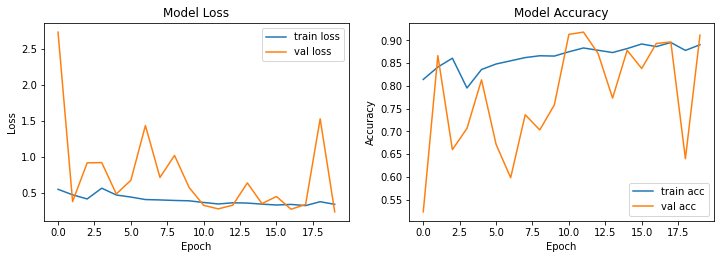

In [38]:
# plot the loss
plt.figure(figsize = (12, 8))
plt.subplot(2,2,1)
plt.plot(train.history['loss'], label='train loss')
plt.plot(train.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()


plt.subplot(2,2,2)
# plot the accuracy
plt.plot(train.history['accuracy'], label='train acc')
plt.plot(train.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [32]:
print("Final Train Accuracy:", train.history['accuracy'][-1])
print("Final Test Accuracy:", train.history['val_accuracy'][-1])
print("Final Train Loss:", train.history['loss'][-1])
print("Final Test Loss:", train.history['val_loss'][-1])

Final Train Accuracy: 0.8905305862426758
Final Test Accuracy: 0.9116666913032532
Final Train Loss: 0.3470648229122162
Final Test Loss: 0.24379640817642212


In [33]:
y_pred = model.predict(test_set)

19/19 [==============================] - 4s 120ms/step


<Figure size 432x288 with 0 Axes>

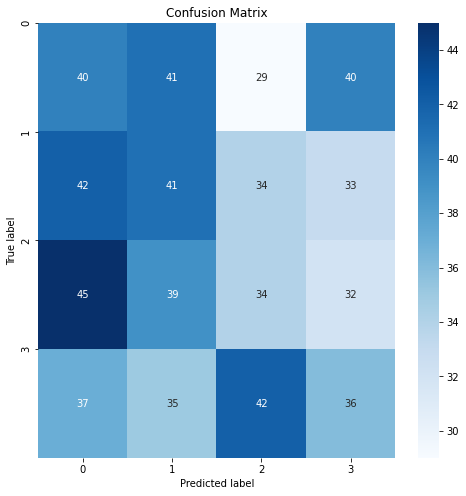

In [34]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

class_indices = test_set.classes
class_names = os.listdir(Validation_DIR)
class_dict = {i: name for i, name in enumerate(class_names)}
test_labels = [class_dict[i] for i in class_indices]
le = LabelEncoder()
encoded_test_labels = le.fit_transform(test_labels)

predictions = np.argmax(y_pred, axis = 1)

cm = confusion_matrix(encoded_test_labels, predictions)
plt.figure()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True, cmap='Blues')
yticklabels = range(len(cm))
ax.set_yticks(yticklabels)
ax.set_yticklabels(yticklabels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [35]:
#for precision calculation
# Total number of instances per class
class_totals = np.sum(cm, axis=0)

# Precision for each class
precision = np.zeros(len(cm))
for i in range(len(cm)):
    precision[i] = cm[i][i] / class_totals[i]

print("Precision per class:", precision)

Precision per class: [0.24390244 0.26282051 0.24460432 0.25531915]


In [36]:
#for f1 score
# Total number of instances per class
class_totals = np.sum(cm, axis=0)

# True positive predictions per class
tp = np.diag(cm)

# Precision and recall per class
precision = tp / class_totals
recall = tp / np.sum(cm, axis=1)

# F1 score per class
f1 = 2 * precision * recall / (precision + recall)

print("Recall score per class:", recall)
print("F1 score per class:", f1)

Recall score per class: [0.26666667 0.27333333 0.22666667 0.24      ]
F1 score per class: [0.25477707 0.26797386 0.23529412 0.24742268]


In [37]:
# save it as a h5 file

#model1 = 20 epose
#model2 = 30 epose
tf.keras.models.save_model(model, '/content/drive/MyDrive/rice_leaf_disease/colab/models/model2.h5')

**second retrain**

In [39]:
#!pip install pyyaml h5py  # Required to save models in HDF5 format
from tensorflow.keras.models import load_model
path = '/content/drive/MyDrive/rice_leaf_disease/colab/models/model2.h5'
model=load_model(path)

In [40]:
#source path for training data
source_path='/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image'

#performing shuffeling operation so that datas are different when retraining model
train_brownspot_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/brownspot'
train_healthy_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/healthy'
train_hispa_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/hispa'
train_leafblast_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/leafblast'

validating_brownspot_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/testing/segmented/brownspot'
validating_healthy_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/testing/segmented/healthy'
validating_hispa_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/testing/segmented/hispa'
validating_leafblast_path = '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/testing/segmented/leafblast'

folders = glob('/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/*')
print(folders)
labels = [i for i in range(len(folders))]

from sklearn.model_selection import train_test_split
from keras.utils import np_utils
new_label = np_utils.to_categorical(labels)

['/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/hispa', '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/healthy', '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/brownspot', '/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/leafblast']


In [41]:
#shuffeling images of specific folders
files = os.listdir(train_brownspot_path)
random.shuffle(files)

files = os.listdir(train_healthy_path)
random.shuffle(files)

files = os.listdir(train_hispa_path)
random.shuffle(files)

files = os.listdir(train_leafblast_path)
random.shuffle(files)

files = os.listdir(validating_brownspot_path)
random.shuffle(files)

files = os.listdir(validating_healthy_path)
random.shuffle(files)

files = os.listdir(validating_hispa_path)
random.shuffle(files)

files = os.listdir(validating_leafblast_path)
random.shuffle(files)

Training_DIR = os.path.join(source_path, 'training/segmented')
Validation_DIR = os.path.join(source_path, 'testing/segmented')


In [42]:
# Use the Image Data Generator to import the images from the dataset
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    rotation_range=30,
                                    zoom_range=0.2,
                                    width_shift_range=0.1,
                                    height_shift_range=0.2,
                                    shear_range=0.2)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [43]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(Training_DIR,
                                                 target_size = (256, 256),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2978 images belonging to 4 classes.


In [44]:
test_set = test_datagen.flow_from_directory(Validation_DIR,
                                            target_size = (256, 256),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 600 images belonging to 4 classes.


In [45]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [46]:
train = model.fit(training_set,
                validation_data = test_set, 
                epochs = 20, 
                steps_per_epoch = len(training_set),
                validation_steps = len(test_set)
                )

Epoch 1/20
94/94 [==============================] - 73s 651ms/step - loss: 0.3723 - accuracy: 0.8741 - val_loss: 0.7910 - val_accuracy: 0.7983
Epoch 2/20
94/94 [==============================] - 62s 661ms/step - loss: 0.4485 - accuracy: 0.8479 - val_loss: 0.3699 - val_accuracy: 0.8617
Epoch 3/20
94/94 [==============================] - 63s 666ms/step - loss: 0.3823 - accuracy: 0.8731 - val_loss: 0.2658 - val_accuracy: 0.9100
Epoch 4/20
94/94 [==============================] - 62s 652ms/step - loss: 0.3426 - accuracy: 0.8875 - val_loss: 0.2924 - val_accuracy: 0.9000
Epoch 5/20
94/94 [==============================] - 59s 623ms/step - loss: 0.3129 - accuracy: 0.8996 - val_loss: 0.3920 - val_accuracy: 0.8350
Epoch 6/20
94/94 [==============================] - 60s 632ms/step - loss: 0.3246 - accuracy: 0.8986 - val_loss: 0.2669 - val_accuracy: 0.8933
Epoch 7/20
94/94 [==============================] - 59s 628ms/step - loss: 0.3131 - accuracy: 0.8983 - val_loss: 5.1995 - val_accuracy: 0.4300

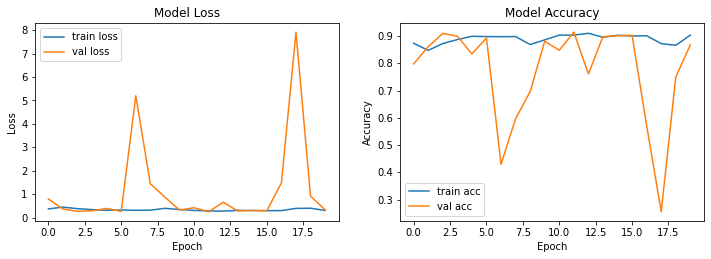

In [47]:
# plot the loss
plt.figure(figsize = (12, 8))
plt.subplot(2,2,1)
plt.plot(train.history['loss'], label='train loss')
plt.plot(train.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()


plt.subplot(2,2,2)
# plot the accuracy
plt.plot(train.history['accuracy'], label='train acc')
plt.plot(train.history['val_accuracy'], label='val acc')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [48]:
print("Final Train Accuracy:", train.history['accuracy'][-1])
print("Final Test Accuracy:", train.history['val_accuracy'][-1])
print("Final Train Loss:", train.history['loss'][-1])
print("Final Test Loss:", train.history['val_loss'][-1])

Final Train Accuracy: 0.9039623737335205
Final Test Accuracy: 0.8683333396911621
Final Train Loss: 0.30607870221138
Final Test Loss: 0.33371105790138245


In [49]:
y_pred = model.predict(test_set)

19/19 [==============================] - 4s 119ms/step


<Figure size 432x288 with 0 Axes>

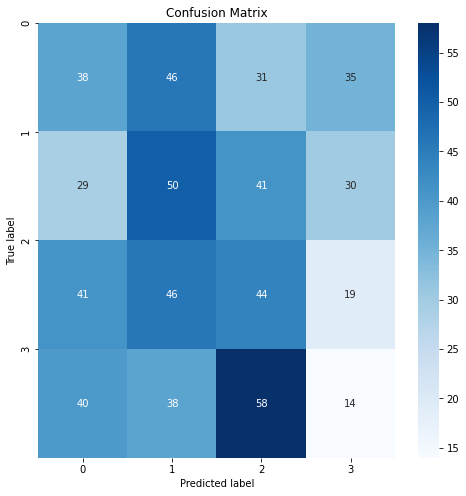

In [50]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

class_indices = test_set.classes
class_names = os.listdir(Validation_DIR)
class_dict = {i: name for i, name in enumerate(class_names)}
test_labels = [class_dict[i] for i in class_indices]
le = LabelEncoder()
encoded_test_labels = le.fit_transform(test_labels)

predictions = np.argmax(y_pred, axis = 1)

cm = confusion_matrix(encoded_test_labels, predictions)
plt.figure()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True, cmap='Blues')
yticklabels = range(len(cm))
ax.set_yticks(yticklabels)
ax.set_yticklabels(yticklabels)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [51]:
#for precision calculation
# Total number of instances per class
class_totals = np.sum(cm, axis=0)

# Precision for each class
precision = np.zeros(len(cm))
for i in range(len(cm)):
    precision[i] = cm[i][i] / class_totals[i]

print("Precision per class:", precision)

Precision per class: [0.25675676 0.27777778 0.25287356 0.14285714]


In [52]:
#for f1 score
# Total number of instances per class
class_totals = np.sum(cm, axis=0)

# True positive predictions per class
tp = np.diag(cm)

# Precision and recall per class
precision = tp / class_totals
recall = tp / np.sum(cm, axis=1)

# F1 score per class
f1 = 2 * precision * recall / (precision + recall)

print("Recall score per class:", recall)
print("F1 score per class:", f1)

Recall score per class: [0.25333333 0.33333333 0.29333333 0.09333333]
F1 score per class: [0.25503356 0.3030303  0.27160494 0.11290323]


In [53]:
# save it as a h5 file

#model1 = 20 epose
#model2 = 30 epose
tf.keras.models.save_model(model, '/content/drive/MyDrive/rice_leaf_disease/colab/models/model3.h5')


**rest are not necessary for training below this code is for testing
**

In [ ]:
#!pip install pyyaml h5py  # Required to save models in HDF5 format
from tensorflow.keras.models import load_model
path = '/content/drive/MyDrive/rice_leaf_disease/colab/model2.h5'
model=load_model(path)

In [ ]:
#img_data
#from tensorflow.keras.preprocessing.image import load_img, img_to_array
#from PIL import Image
import cv2
#img= Image.open('/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image//training/segmented/brownspot/IMG_20190420_200400.jpg')
img = cv2.imread('/content/drive/MyDrive/rice_leaf_disease/colab/dataset/image/training/segmented/brownspot/IMG_20190420_200400.jpg')
plt.imshow(img)
#img.shape

In [ ]:
x=img_to_array(img)
#x

In [ ]:

x=x/255
x.shape

(256, 256, 3)

In [ ]:
# import numpy as np
x.shape
#x=np.expand_dims(x,axis=0)
#x = np.resize(x,(1,*x.shape)
x = x[np.newaxis,:]
x.shape

(1, 256, 256, 3)

In [ ]:
result = []
result = model.predict(x)

In [ ]:
print("Probability of brownspot = ", result[0][0])
print("Probability of healthy = ", result[0][1])
print("Probability of hispa = ", result[0][2])
print("Probability of leafblast = ", result[0][3])